In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from PIL import Image
import pandas as pd
import seaborn as sns

In [ ]:
DATASET_DIR = Path("data/")
CLASS_NAMES = ["NORMAL", "PNEUMONIA"]

In [9]:
image_paths = []
labels = []
data_split = "train"  # or val or "test"

for class_name in CLASS_NAMES:
    class_dir = os.path.join(DATASET_DIR, data_split, class_name)
    
    file_names = os.listdir(class_dir)
    count = 0
    for file_name in file_names:
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(class_dir, file_name)
            image_paths.append(image_path)
            labels.append(class_name)
            count += 1
    print(f"Found {count} images in {class_name} class for {data_split} set.")

print(f"Total images in {data_split} set: {len(image_paths)}")


Found 1341 images in NORMAL class for train set.
Found 3875 images in PNEUMONIA class for train set.
Total images in train set: 5216


In [12]:
train_data = pd.DataFrame({
    "filepath": image_paths,
    "label": labels
})
print(train_data.head())
train_data.info()

                                      filepath   label
0  data/train/NORMAL/NORMAL2-IM-0927-0001.jpeg  NORMAL
1  data/train/NORMAL/NORMAL2-IM-1056-0001.jpeg  NORMAL
2          data/train/NORMAL/IM-0427-0001.jpeg  NORMAL
3  data/train/NORMAL/NORMAL2-IM-1260-0001.jpeg  NORMAL
4     data/train/NORMAL/IM-0656-0001-0001.jpeg  NORMAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  5216 non-null   object
 1   label     5216 non-null   object
dtypes: object(2)
memory usage: 81.6+ KB


Class distribution:
label
PNEUMONIA    3875
NORMAL       1341
Name: count, dtype: int64


/var/folders/9z/yj4b0q256fs12rkt272k2b480000gn/T/ipykernel_61515/296479205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_data, palette='viridis')


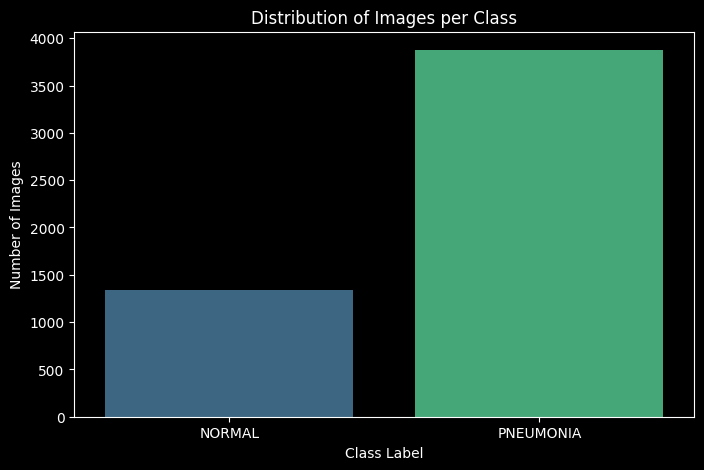

In [17]:
# Class distribution count
class_counts = train_data['label'].value_counts()
print("Class distribution:")
print(class_counts)
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=train_data, palette='viridis')
plt.title('Distribution of Images per Class')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.show()

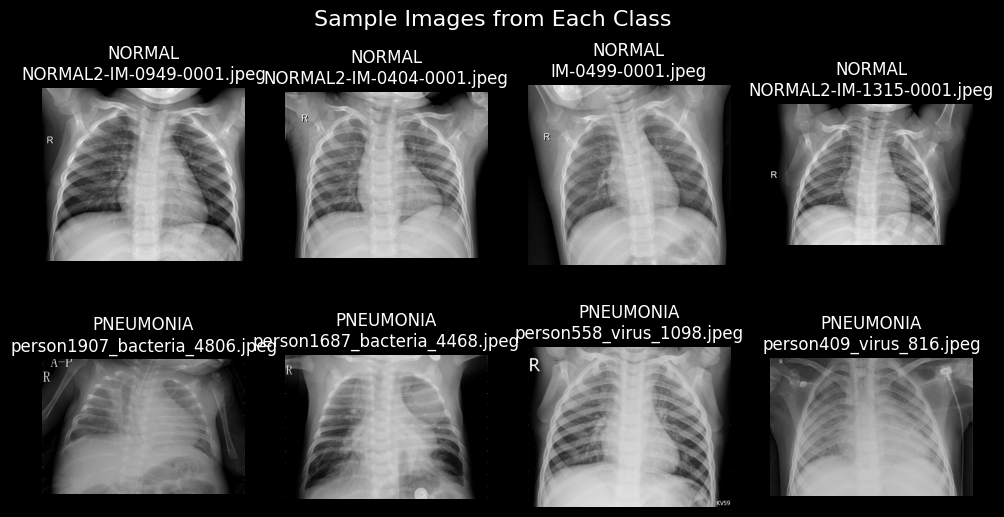

In [21]:
# Display some images from the dataset

plt.figure(figsize=(12, 6))
num_samples_to_show = 4 # Show N samples per class

for i, class_name in enumerate(CLASS_NAMES):
    # Get random sample filepaths for the current class
    sample_indices = train_data[train_data['label'] == class_name].sample(num_samples_to_show).index
    sample_filepaths = train_data.loc[sample_indices, 'filepath'].tolist()

    for j, filepath in enumerate(sample_filepaths):
        try:
            img = Image.open(filepath)
            # Convert grayscale images to RGB for consistent display if needed
            if img.mode != 'RGB':
                 img = img.convert('RGB')

            ax = plt.subplot(len(CLASS_NAMES), num_samples_to_show, i * num_samples_to_show + j + 1)
            plt.imshow(img)
            plt.title(f"{class_name}\n{os.path.basename(filepath)}")
            plt.axis("off")
        except Exception as e:
            print(f"Error loading or displaying image {filepath}: {e}")

plt.suptitle('Sample Images from Each Class', fontsize=16)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

In [22]:
# d) Examine Image Properties (Size, Mode) of a few samples
print("\nExamining properties of a few sample images:")
num_properties_to_check = 5
sample_indices = train_data.sample(num_properties_to_check).index

image_properties = []
for idx in sample_indices:
    filepath = train_data.loc[idx, 'filepath']
    label = train_data.loc[idx, 'label']
    try:
        with Image.open(filepath) as img: # Use 'with' to ensure file closure
            img_size = img.size  # (width, height)
            img_mode = img.mode  # e.g., 'L' (grayscale), 'RGB' (color)
            image_properties.append({
                'filename': os.path.basename(filepath),
                'label': label,
                'size': img_size,
                'mode': img_mode
            })
    except Exception as e:
        print(f"Could not read properties for {filepath}: {e}")
        image_properties.append({
                'filename': os.path.basename(filepath),
                'label': label,
                'size': 'Error',
                'mode': 'Error'
            })

properties_df = pd.DataFrame(image_properties)
print(properties_df)

# Check for variations in image sizes
print("\nUnique Image Sizes Found in Sample:")
print(properties_df['size'].value_counts())

print("\nUnique Image Modes Found in Sample:")
print(properties_df['mode'].value_counts())



Examining properties of a few sample images:
                     filename      label          size mode
0   person968_virus_1642.jpeg  PNEUMONIA   (1264, 840)    L
1           IM-0621-0001.jpeg     NORMAL  (1524, 1171)    L
2   NORMAL2-IM-0675-0001.jpeg     NORMAL  (1460, 1233)    L
3  person67_bacteria_332.jpeg  PNEUMONIA    (728, 392)    L
4    person326_virus_672.jpeg  PNEUMONIA  (1488, 1168)    L

Unique Image Sizes Found in Sample:
size
(1264, 840)     1
(1524, 1171)    1
(1460, 1233)    1
(728, 392)      1
(1488, 1168)    1
Name: count, dtype: int64

Unique Image Modes Found in Sample:
mode
L    5
Name: count, dtype: int64
